In [10]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [11]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [12]:
dataset = np.loadtxt('./Datasets/5_Neural_Network_Data/Diabetes.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]

### Input variables:
- Number of pregnancies
- Plasma glucose concentration after 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-hour serum insulin concentration (μIU/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)

Y: Class label (0 or 1)

In [13]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [14]:
model = nn.Sequential(
    nn.Linear(8, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid())

In [15]:
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)


In [16]:
import torch.nn as nn

# Define Classifier, which inherits from nn.Module from PyTorch.
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()

        # Define neural network layers.
        self.hidden1 = nn.Linear(8, 12)  # Hidden layer 1 with 8 inputs and 12 outputs.
        self.act1 = nn.ReLU()  # ReLU activation function after hidden layer 1.
        self.hidden2 = nn.Linear(12, 8)  # Hidden layer 2 with 12 inputs and 8 outputs.
        self.act2 = nn.ReLU()  # ReLU activation function after hidden layer 2.
        self.output = nn.Linear(8, 1)  # Output layer with 8 inputs and 1 output.
        self.act_output = nn.Sigmoid()  # Sigmoid activation function after output layer.

    def forward(self, x):
        # Defines the forward pass of the neural network.
        x = self.act1(self.hidden1(x))  # Passes data through hidden layer 1 with ReLU.
        x = self.act2(self.hidden2(x))  # Passes data through hidden layer 2 with ReLU.
        x = self.act_output(self.output(x))  # Passes data through the output layer with Sigmoid.
        return x

# Creates an instance of the classifier model.
model = Classifier()

# Displays the model definition.
print(model)

Classifier(
  (hidden1): Linear(in_features=8, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [17]:
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
# batch size and epochs
n_epochs = 2000
batch_size = 10

for epoch in range(n_epochs):
    # Training loop over training data with batch-wise processing.
    for i in range(0, len(X), batch_size):
        # Selects a batch of training data.
        Xbatch = X[i:i+batch_size]

        # Predicts outcomes using the model.
        y_pred = model(Xbatch)

        # Selects corresponding labels for the batch of data.
        ybatch = y[i:i+batch_size]

        # Computes the loss between predictions and actual labels.
        loss = loss_fn(y_pred, ybatch)

        # Resets gradients in the optimizer.
        optimizer.zero_grad()

        # Computes gradients of the loss via backpropagation.
        loss.backward()

        # Updates model weights based on gradients.
        optimizer.step()

    # Displays training progress information after each epoch.
    print(f'Epoch {epoch}, loss function {loss}')
torch.save(model.state_dict(), "./Models/Diabetes_Neural_Network_model.pth")

Epoch 0, loss function 0.7797643542289734
Epoch 1, loss function 0.7523782849311829
Epoch 2, loss function 0.7465546131134033
Epoch 3, loss function 0.7425191402435303
Epoch 4, loss function 0.7281944751739502


Epoch 5, loss function 0.7117177844047546
Epoch 6, loss function 0.6950899958610535
Epoch 7, loss function 0.691730260848999
Epoch 8, loss function 0.6792719960212708
Epoch 9, loss function 0.6725051999092102
Epoch 10, loss function 0.65764319896698
Epoch 11, loss function 0.6488295197486877
Epoch 12, loss function 0.6409978270530701
Epoch 13, loss function 0.6368810534477234
Epoch 14, loss function 0.6327234506607056
Epoch 15, loss function 0.6298213601112366
Epoch 16, loss function 0.6265490651130676
Epoch 17, loss function 0.6221281290054321
Epoch 18, loss function 0.6161104440689087
Epoch 19, loss function 0.6126775145530701
Epoch 20, loss function 0.6102656722068787
Epoch 21, loss function 0.5985895395278931
Epoch 22, loss function 0.5905178189277649
Epoch 23, loss function 0.5807188153266907
Epoch 24, loss function 0.5655454993247986
Epoch 25, loss function 0.563506543636322
Epoch 26, loss function 0.5600133538246155
Epoch 27, loss function 0.5537400841712952
Epoch 28, loss funct

In [19]:
# Set evaluation mode (without computing gradients) using torch.no_grad().
with torch.no_grad():
    # Predict outcomes using the model on the entire training dataset.
    y_pred = model(X)

# Computes the accuracy of the model on the training data.
# Accuracy is the percentage of correctly classified examples.
accuracy = (y_pred.round() == y).float().mean()

# Displays the accuracy result.
print(f"Accuracy {accuracy}")

Accuracy 0.8385416865348816


In [20]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim


dataset = np.loadtxt('./Datasets/5_Neural_Network_Data/Diabetes.csv', delimiter=',')
X = dataset[:,0:8]
y = dataset[:,8]

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)


model = nn.Sequential(
    nn.Linear(8, 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid()
)
print(model)


loss_fn   = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 500
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch}, loss function {loss}')

with torch.no_grad():
    y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

Sequential(
  (0): Linear(in_features=8, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
  (5): Sigmoid()
)
Epoch 0, loss function 0.5890101790428162
Epoch 1, loss function 0.4935603439807892
Epoch 2, loss function 0.4869958460330963
Epoch 3, loss function 0.47171488404273987
Epoch 4, loss function 0.4753878712654114
Epoch 5, loss function 0.4768948256969452
Epoch 6, loss function 0.47561323642730713
Epoch 7, loss function 0.48521706461906433
Epoch 8, loss function 0.48712050914764404
Epoch 9, loss function 0.4862056076526642
Epoch 10, loss function 0.48555898666381836
Epoch 11, loss function 0.48965632915496826
Epoch 12, loss function 0.4869050085544586
Epoch 13, loss function 0.48590147495269775
Epoch 14, loss function 0.487018883228302
Epoch 15, loss function 0.4856848120689392
Epoch 16, loss function 0.48777252435684204
Epoch 17, loss function 0.48407676815986633

In [21]:
predictions = model(X)
rounded = predictions.round()

In [22]:
predictions = (model(X) > 0.5).int()

In [23]:
predictions = (model(X) > 0.5).int()
for i in range(10):
    print('%s => %d (Expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.0, 148.0, 72.0, 35.0, 0.0, 33.599998474121094, 0.6269999742507935, 50.0] => 1 (Expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.600000381469727, 0.35100001096725464, 31.0] => 0 (Expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.299999237060547, 0.671999990940094, 32.0] => 1 (Expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.100000381469727, 0.16699999570846558, 21.0] => 0 (Expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.099998474121094, 2.2880001068115234, 33.0] => 1 (Expected 1)
[5.0, 116.0, 74.0, 0.0, 0.0, 25.600000381469727, 0.20100000500679016, 30.0] => 0 (Expected 0)
[3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.24799999594688416, 26.0] => 0 (Expected 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 35.29999923706055, 0.1340000033378601, 29.0] => 1 (Expected 0)
[2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.15800000727176666, 53.0] => 1 (Expected 1)
[8.0, 125.0, 96.0, 0.0, 0.0, 0.0, 0.23199999332427979, 54.0] => 1 (Expected 1)


## Utilizing Neural Networks in Classification: Iris Dataset

**Objective:**
Using the Iris dataset, which was used in the classic work by R.A. Fisher in 1936 titled "The Use of Multiple Measurements in Taxonomic Problems," conduct exploratory data analysis and build a classification model. The dataset is also available in the UCI Machine Learning repository.

**Dataset Description:**
The dataset contains samples of three species of irises (50 samples each), along with certain properties describing each flower. One of the iris species is linearly separable from the other two, which are not linearly separable from each other.

Columns in the dataset are:
1. Id - unique sample identifier,
2. SepalLengthCm - length of the sepal in centimeters,
3. SepalWidthCm - width of the sepal in centimeters,
4. PetalLengthCm - length of the petal in centimeters,
5. PetalWidthCm - width of the petal in centimeters,
6. Species - iris species.

**Tasks to Perform:**

1. Load the dataset (Iris.csv) and perform initial data analysis. Check for missing values and present descriptive statistics of each feature.
2. Conduct exploratory data analysis. Use visualizations such as histograms, scatter plots, and box plots to understand the distribution of data and relationships between variables.
3. Prepare the data for modeling. If necessary, scale the features and split the dataset into training and testing sets.
4. Build a classification model that can recognize the iris species based on the provided features.
5. Evaluate the model's effectiveness using appropriate metrics such as accuracy, confusion matrix, and classification report.
6. Perform cross-validation to verify the model's stability.
7. Conduct any necessary model optimizations to try to improve its performance.
8. Interpret the results and present conclusions regarding the model and the analyzed data.

**Tips:**
- Pay attention to appropriate visualizations - they should help in understanding the data and results.
- Consider different data processing and feature selection strategies to improve model results.
- Document all steps of the analysis thoroughly.


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris_data = pd.read_csv('./Datasets/5_Neural_Network_Data/Iris.csv')
print(iris_data.isnull().sum())
print(iris_data.head())
print(iris_data.describe())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.10000

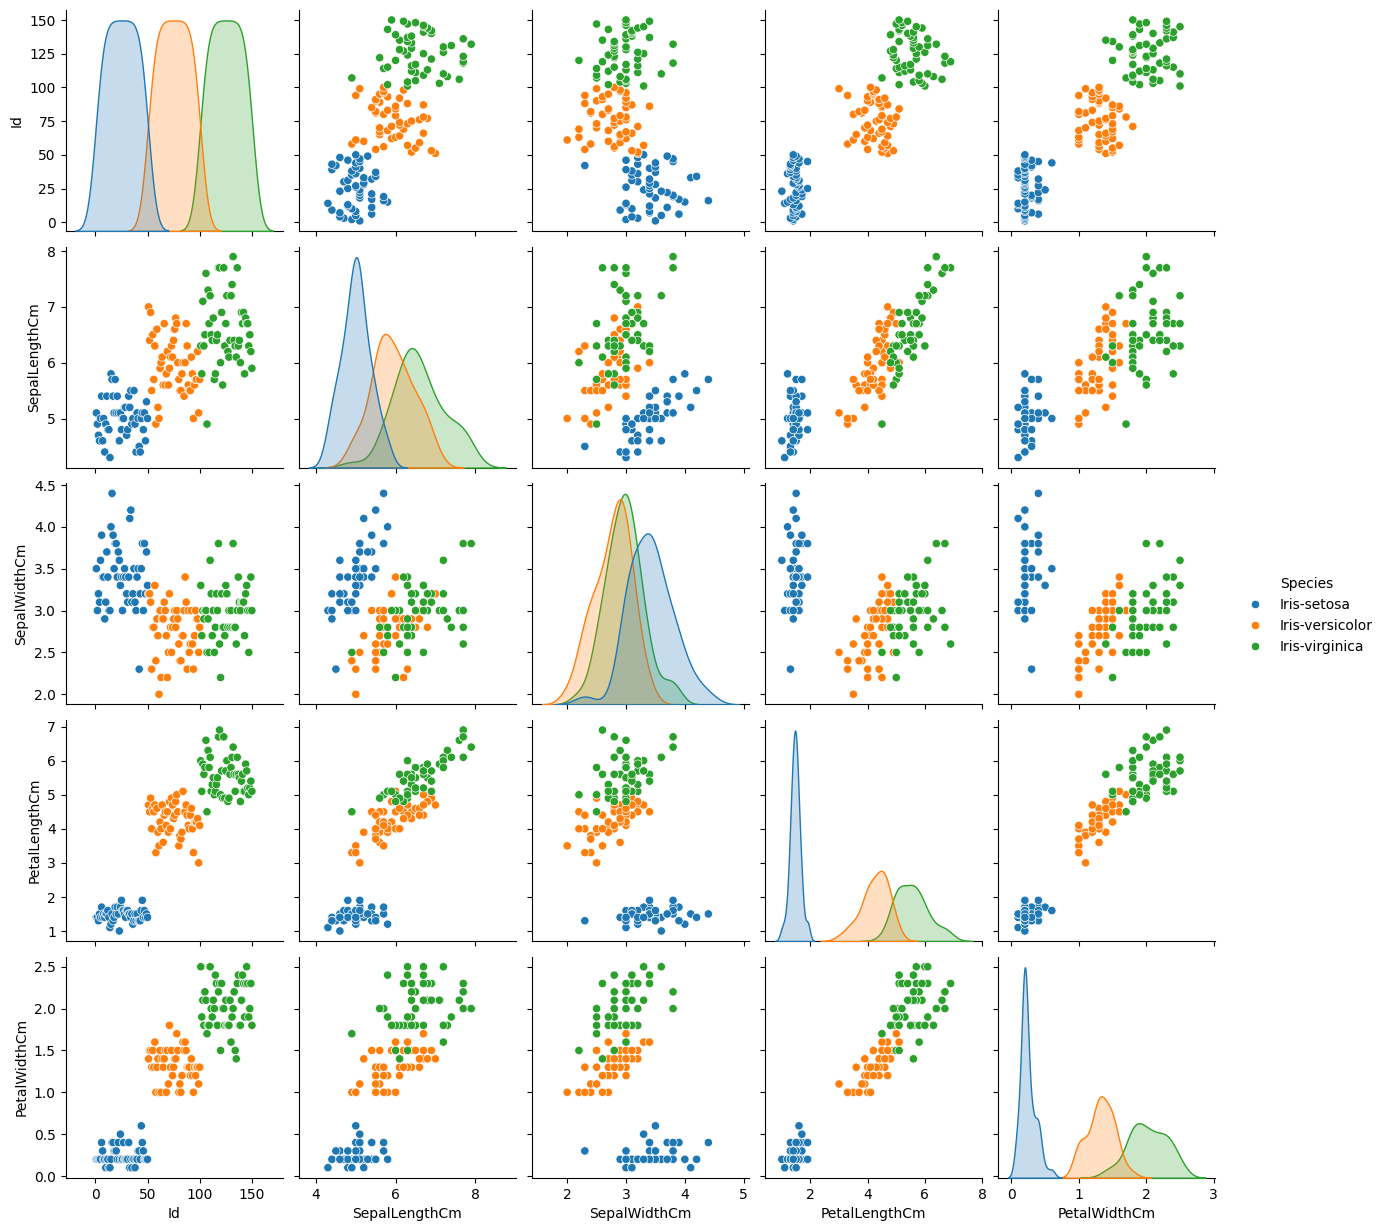

In [41]:
sns.pairplot(iris_data, hue="Species")
plt.show()

In [42]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# scaling numerical data 
scaler = StandardScaler()
X = scaler.fit_transform(iris_data.iloc[:, 1:5])
y = iris_data['Species']

# we encode species names using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Get the original class names
original_class_names = label_encoder.classes_

#Print the original class names along with their encoded values
for encoded_value, class_name in enumerate(original_class_names):
    print(f"Encoded value: {encoded_value}, Original class name: {class_name}")

# split for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Pdefine tensor for PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)


Encoded value: 0, Original class name: Iris-setosa
Encoded value: 1, Original class name: Iris-versicolor
Encoded value: 2, Original class name: Iris-virginica


In [43]:
# define Classifier
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(4, 12)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(12, 8)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(8, 3)  # 3 iris species
        self.act_output = nn.Softmax(dim=1)  # Softmax activation layer, multi-class classification

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x

# define model classifier
model = Classifier()

# loss function and optim
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [48]:
# batch size and epochs
n_epochs = 300
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]

        # reset the gradient
        optimizer.zero_grad()

        # passing data throught model
        y_pred = model(X_batch)

        # loss 
        loss = loss_fn(y_pred, y_batch)

        # backpropagation gradient
        loss.backward()

        # update the model weights based on the gradients
        optimizer.step()

    print(f'Epoch {epoch}, loss function {loss.item()}')
torch.save(model.state_dict(), "./Models/Iris_Neural_Network_model.pth")

Epoch 0, loss function 0.5740837454795837
Epoch 1, loss function 0.5738946199417114
Epoch 2, loss function 0.5737137198448181
Epoch 3, loss function 0.5735311508178711
Epoch 4, loss function 0.5733510255813599
Epoch 5, loss function 0.5731691122055054
Epoch 6, loss function 0.5729964971542358
Epoch 7, loss function 0.5728317499160767
Epoch 8, loss function 0.5726665258407593
Epoch 9, loss function 0.5724925398826599
Epoch 10, loss function 0.5723274350166321
Epoch 11, loss function 0.5721604228019714
Epoch 12, loss function 0.5720006227493286
Epoch 13, loss function 0.5718396902084351
Epoch 14, loss function 0.571683943271637
Epoch 15, loss function 0.5715259313583374
Epoch 16, loss function 0.5713632702827454
Epoch 17, loss function 0.5712078809738159
Epoch 18, loss function 0.5710636377334595
Epoch 19, loss function 0.5709127187728882
Epoch 20, loss function 0.5707579851150513
Epoch 21, loss function 0.5706156492233276
Epoch 22, loss function 0.5704694390296936
Epoch 23, loss functio

In [49]:
with torch.no_grad():
    y_pred = model(X_test)

# Oblicz dokładność (accuracy) modelu na danych testowych.
accuracy = (y_pred.argmax(dim=1) == y_test).float().mean()
print(f"Accuracy: {accuracy.item()}")


Accuracy: 0.9666666388511658


In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ocen skuteczność modelu na danych testowych
y_pred = model(X_test)
y_pred_class = y_pred.argmax(dim=1)
y_test_numpy = y_test.numpy()
y_pred_class_numpy = y_pred_class.numpy()

# Accuracy
accuracy = accuracy_score(y_test_numpy, y_pred_class_numpy)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_numpy, y_pred_class_numpy)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report
class_report = classification_report(y_test_numpy, y_pred_class_numpy)
print('Classification Report:')
print(class_report)


Accuracy: 0.9666666666666667
Confusion Matrix:
[[ 8  0  0]
 [ 0  8  0]
 [ 0  1 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.89      1.00      0.94         8
           2       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



In [52]:
import numpy as np
import plotly.express as px

confusion_m = confusion_matrix(y_test_numpy, y_pred_class_numpy)
confusion_m = np.round((confusion_m / confusion_m.sum()) * 100, 2)

fig = px.imshow(confusion_m, text_auto=True, labels=dict(x="Predicted Labels", y="True Labels", color="Color scale"),
                x=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                y=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
               )

fig.show()

## Utilizing Neural Networks in Regression: Analysis and Modeling of House Prices in Boston

**Dataset Description:**
The Boston housing price dataset was taken from the work of Harrison, D. and Rubinfeld, D.L. "Hedonic prices and the demand for clean air", Journal of Environmental Economics & Management, vol.5, pages 81-102, 1978. The dataset contains information about the real estate market and factors affecting house prices.

**Attribute Information:**
The data consists of the following features:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million)
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000
11) PTRATIO: pupil-teacher ratio by town
12) B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's

**Data Sources:**
The data is derived from StatLib - Carnegie Mellon University.

**Tasks to Perform:**
Conduct analysis and modeling of house prices in Boston using the available data. Follow these steps:

1. Load the dataset (boston-housing-dataset.csv) and perform initial analysis. Check for missing values and calculate descriptive statistics.
2. Conduct data exploration, including visualizations such as histograms, scatter plots, and box plots.
3. Prepare the data for modeling, including feature scaling and splitting into training and testing sets.
4. Build a regression model predicting the median value of owner-occupied homes.
5. Evaluate the model's performance using appropriate metrics such as RMSE (Root Mean Square Error) and R^2.
6. Apply cross-validation to check the stability of the model.
7. Optimize the model if necessary.
8. Interpret the results and present conclusions regarding the impact of individual features on house prices.

**Tips:**
- Remember to check for and handle outliers and multicollinearity between variables.
- Utilize regularization if needed to avoid overfitting.


In [53]:
import pandas as pd

data = pd.read_csv('./Datasets/5_Neural_Network_Data/boston-housing-dataset.csv')


print(data.head())
missing_values = data.isnull().sum()
print("Missing values:")
print(missing_values)

statistics = data.describe()
print("Describe:")
print(statistics)

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

     TAX  PTRATIO       B  LSTAT  MEDV  
0  296.0     15.3  396.90   4.98  24.0  
1  242.0     17.8  396.90   9.14  21.6  
2  242.0     17.8  392.83   4.03  34.7  
3  222.0     18.7  394.63   2.94  33.4  
4  222.0     18.7  396.90   5.33  36.2  
Missing values:
Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
MEDV          0
dtype: int64
Describe:
      

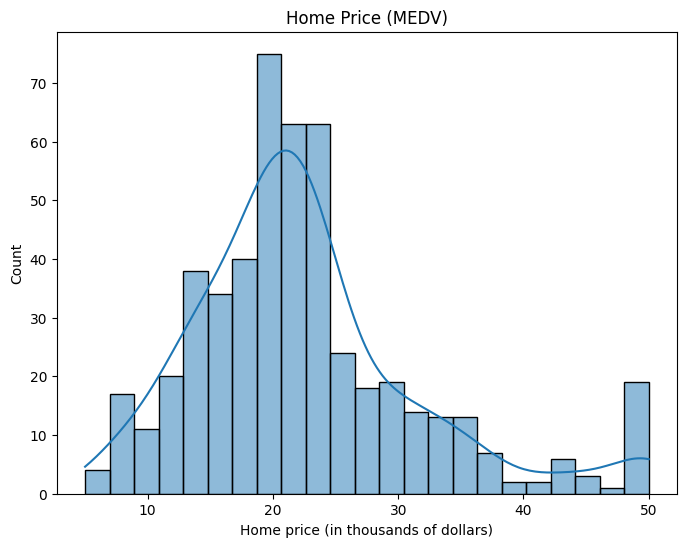

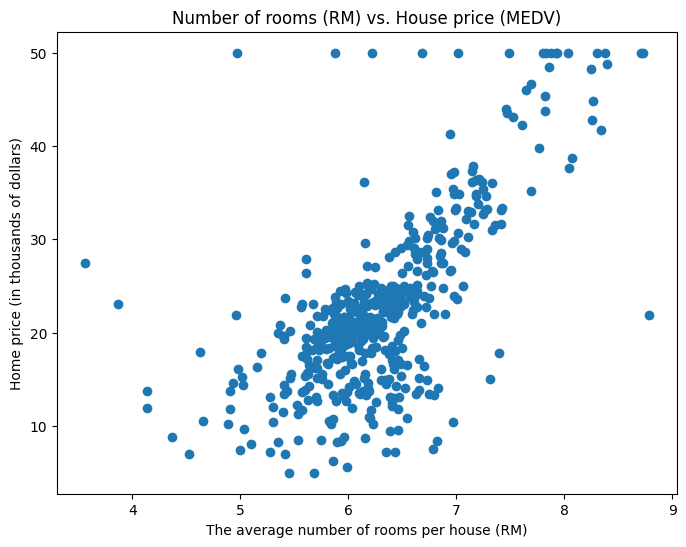

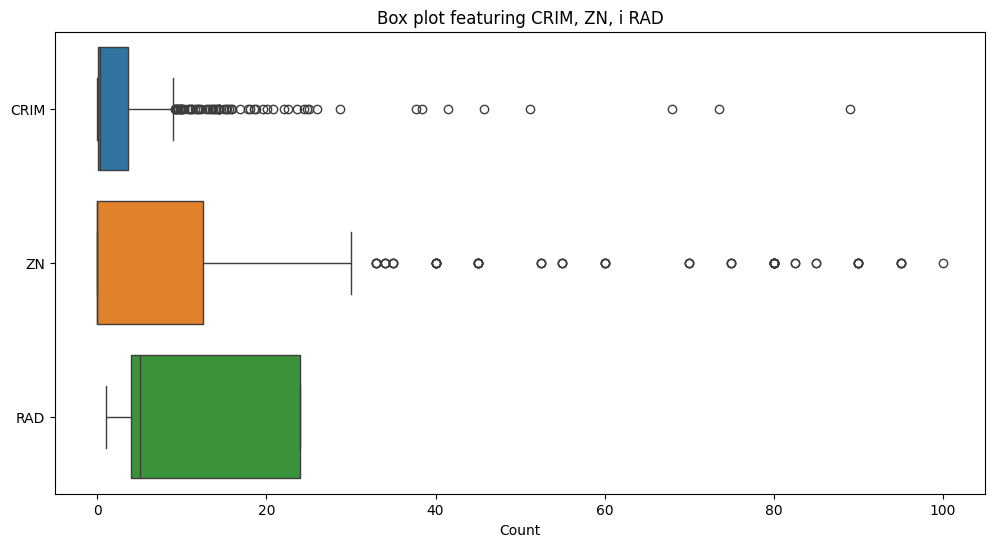

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# histogram Home Price (MEDV)
plt.figure(figsize=(8, 6))
sns.histplot(data['MEDV'], kde=True)
plt.title('Home Price (MEDV)')
plt.xlabel('Home price (in thousands of dollars)')
plt.ylabel('Count')
plt.show()

# Scatter plot Number of rooms (RM) vs. House price (MEDV)
plt.figure(figsize=(8, 6))
plt.scatter(data['RM'], data['MEDV'])
plt.title('Number of rooms (RM) vs. House price (MEDV)')
plt.xlabel('The average number of rooms per house (RM)')
plt.ylabel('Home price (in thousands of dollars)')
plt.show()

# Box plot featuring CRIM, ZN, i RAD
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['CRIM', 'ZN', 'RAD']], orient='h')
plt.title('Box plot featuring CRIM, ZN, i RAD')
plt.xlabel('Count')
plt.show()


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Scaling features using standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Displaying the sizes of training and testing sets
print(f'Training Set shape: {X_train.shape}')
print(f'Test Set shape: {X_test.shape}')

Training Set shape: (404, 14)
Test Set shape: (102, 14)


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")


MSE: 24.497819777630372
R^2: 0.6659408703343038


In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import numpy as np

# 5-fold cross-validation 
cv_scores = cross_val_score(regression_model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)  # Multiply by -1 and calculate square root

# R^2 on test set
r2_test = r2_score(y_test, y_pred)

print(f"Average RMSE (cross-validation): {rmse_scores.mean()}")
print(f"Average R^2 (cross-validation): {np.mean(cross_val_score(regression_model, X_scaled, y, cv=5, scoring='r2'))}")
print(f"R^2 on test set: {r2_test}")

Average RMSE (cross-validation): 5.843570031453089
Average R^2 (cross-validation): 0.35205252566285833
R^2 on test set: 0.6659408703343038


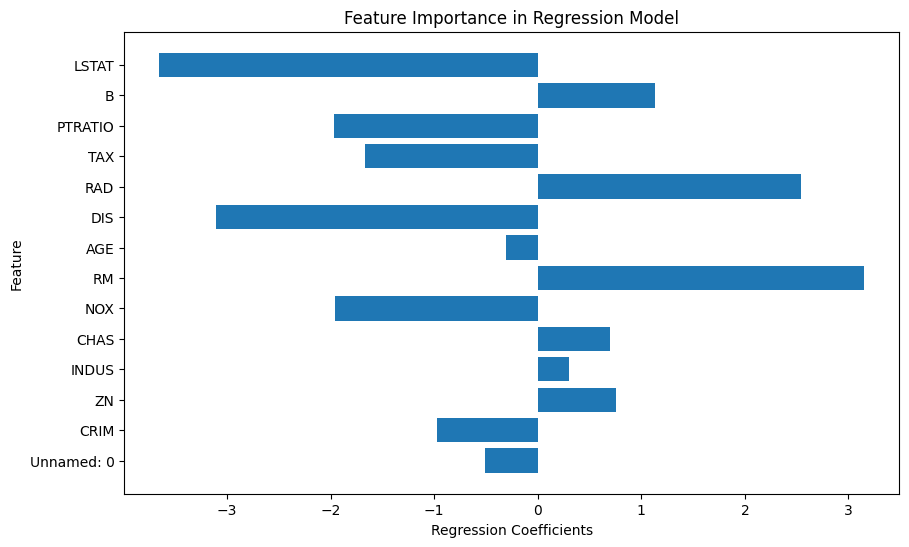

In [58]:
# Regression coefficients
coefficients = regression_model.coef_

# Assign feature names to coefficients
feature_names = X.columns

# Create feature importance plots
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.title('Feature Importance in Regression Model')
plt.xlabel('Regression Coefficients')
plt.ylabel('Feature')
plt.show()

Epoch 0, loss function 392.5494079589844
Epoch 1, loss function 381.67657470703125
Epoch 2, loss function 356.6896057128906
Epoch 3, loss function 303.821533203125
Epoch 4, loss function 210.25775146484375
Epoch 5, loss function 114.10018920898438
Epoch 6, loss function 62.26849365234375
Epoch 7, loss function 52.28927993774414
Epoch 8, loss function 49.54238510131836
Epoch 9, loss function 42.76762008666992
Epoch 10, loss function 35.76601791381836
Epoch 11, loss function 30.43071746826172
Epoch 12, loss function 26.626455307006836
Epoch 13, loss function 23.907543182373047
Epoch 14, loss function 21.867271423339844
Epoch 15, loss function 20.239776611328125
Epoch 16, loss function 18.877574920654297
Epoch 17, loss function 17.705337524414062
Epoch 18, loss function 16.672630310058594
Epoch 19, loss function 15.736106872558594
Epoch 20, loss function 14.845914840698242
Epoch 21, loss function 13.89669418334961
Epoch 22, loss function 13.044332504272461
Epoch 23, loss function 12.26612

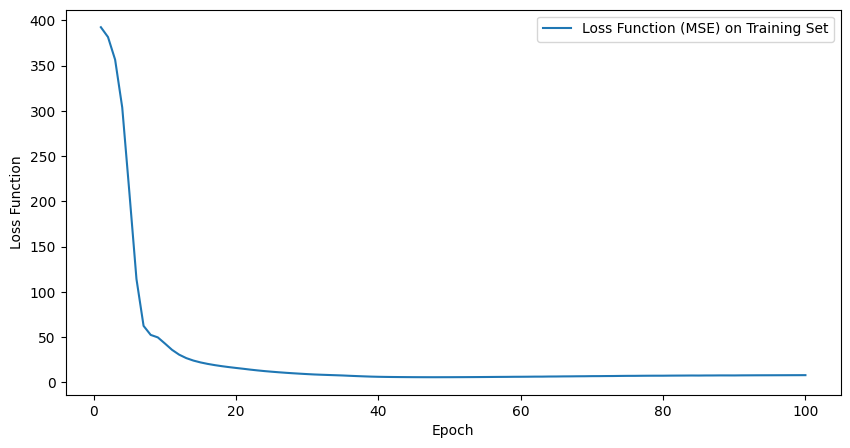

In [59]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define model
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)

# loss func and optim
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 100
batch_size = 10

train_losses = []

for epoch in range(n_epochs):
    for i in range(0, len(X_train), batch_size):
        X_batch = torch.tensor(X_train[i:i + batch_size], dtype=torch.float32)
        y_batch = torch.tensor(y_train[i:i + batch_size], dtype=torch.float32).reshape(-1, 1)

        # reset gradients
        optimizer.zero_grad()

        # prediction
        y_pred = model(X_batch)

        # loss evaluation
        loss = loss_fn(y_pred, y_batch)

        # backpropagation
        loss.backward()
        optimizer.step()
    train_losses.append(loss.item())
    print(f'Epoch {epoch}, loss function {loss.item()}')

torch.save(model.state_dict(), "./Models/Boston-housing_Neural_Network_model.pth")

y_pred = model(torch.tensor(X_train, dtype=torch.float32))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred.detach().numpy()))
r2_train = r2_score(y_train, y_pred.detach().numpy())

print(f"RMSE on training data: {rmse_train}")
print(f"R^2 on training data: {r2_train}")

y_pred = model(torch.tensor(X_test, dtype=torch.float32))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred.detach().numpy()))
r2_test = r2_score(y_test, y_pred.detach().numpy())

print(f"RMSE on test data: {rmse_test}")
print(f"R^2 on test data: {r2_test}")

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_epochs + 1), train_losses, label='Loss Function (MSE) on Training Set')
plt.xlabel('Epoch')
plt.ylabel('Loss Function')
plt.legend()
plt.show()


In [60]:
from sklearn.model_selection import KFold

# define model
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 12),
    nn.ReLU(),
    nn.Linear(12, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)

# loss func and optim
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# KFold validation
kf = KFold(n_splits=5, shuffle=True, random_state=303)

rmse_scores = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    X_train = torch.tensor(X_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
    X_val = torch.tensor(X_val, dtype=torch.float32)
    y_val = torch.tensor(y_val, dtype=torch.float32).reshape(-1, 1)

    for epoch in range(n_epochs):
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i:i + batch_size]
            y_batch = y_train[i:i + batch_size]
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()
            optimizer.step()

    y_pred = model(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred.detach().numpy()))
    rmse_scores.append(rmse)

print(f"Average RMSE (cross-validation): {np.mean(rmse_scores)}")


Average RMSE (cross-validation): 5.249162197113037
